In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import Tensor
import torchvision
import matplotlib.pyplot as plt
import statistics
import random
import time
import math
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10

In [3]:
from toolset.data import _extract_tensors

In [4]:
dset = torchvision.datasets.CIFAR10(root=".", download=True, train=True)
x, y = _extract_tensors(dset, num=10)
print(x.shape)  # 输出应该为：torch.Size([10, 3, 32, 32])
print(y.shape)  # 输出应该为：torch.Size([10])


Files already downloaded and verified
torch.Size([10, 3, 32, 32])
torch.Size([10])


可以看到channel在最后一维度 (50000, 32, 32, 3)
[0.60392157 0.69411765 0.73333333]


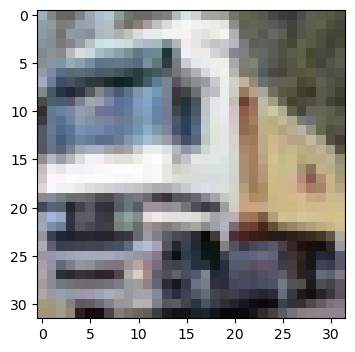

In [5]:
print("可以看到channel在最后一维度",dset.data.shape)  # 通道在最后
"""
plt.imshow 它期望的输入是在0-1范围内的浮点数，或者在0-255范围内的整数。拿到的数据是整数，除以255之后仍然可以正常工作。除以别的数就不行。
同时，plt需要图像格式为(H, W, C)，而不是(C, H, W)
"""
x1 = dset.data[1] / 255   # 卡车
print(x1[0, 0])  # (32, 32, 3) -> (3)
plt.imshow(x1)

torch.Size([10, 3, 32, 32]) torch.Size([10])


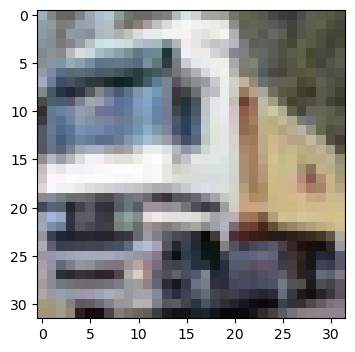

In [6]:
x, y = _extract_tensors(dset, 10)
print(x.shape, y.shape)
def show_1_tensor(x:Tensor):
    plt.imshow(x.permute(1, 2, 0).numpy())
    plt.show()
    
show_1_tensor(x[1])

In [9]:
from toolset import data
a = data.preprocess_cifar10(show_examples=False,flatten=True,bias_trick=True)


In [16]:
a['X_train'].shape

torch.Size([40000, 3073])

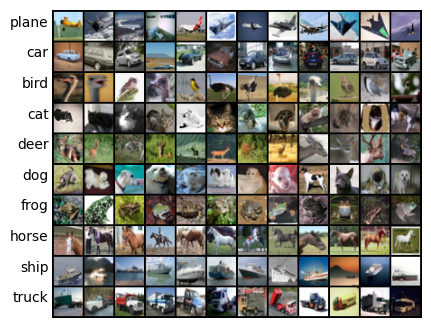

In [19]:
from toolset import helper
data_dict = helper.get_CIFAR10_data()

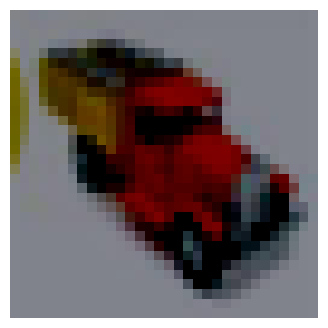

In [26]:
from toolset import utils
data_dict['X_val'].shape
plt.axis("off")
plt.imshow(utils.tensor_to_image(data_dict['X_val'][1]))

In [30]:
test_dict = {}
test_dict["123"] = 5
test_dict["13"] = 6
extra = ", ".join(f'"{key}"' for key in test_dict.keys())
print(extra)

"123", "13"


In [39]:
torch.randperm(10)[:4]

tensor([1, 6, 9, 7])

In [3]:
a = 1
a += (100 % 10) != 0
a

1

In [8]:
import torch
y = [torch.tensor([1,2,1]),torch.tensor([1,4,1]),torch.tensor([1,3,1])]
ycat = torch.cat(y)
print(ycat, ycat.shape) # (N,)


tensor([1, 2, 1, 1, 4, 1, 1, 3, 1]) torch.Size([9])


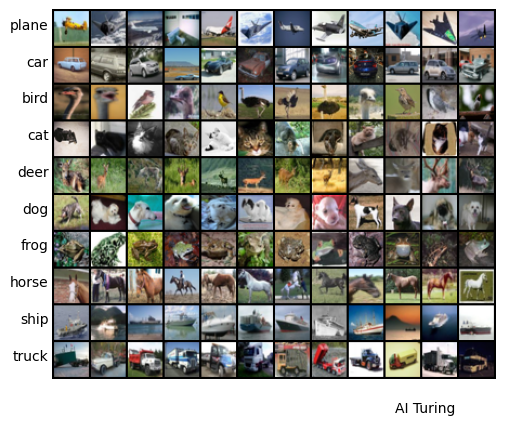

Train data shape:  torch.Size([40000, 3072])
Train labels shape:  torch.Size([40000])
Validation data shape:  torch.Size([10000, 3072])
Validation labels shape:  torch.Size([10000])
Test data shape:  torch.Size([10000, 3072])
Test labels shape:  torch.Size([10000])


In [39]:
import toolset
toolset.utils.reset_seed(0)
data_dict = toolset.data.preprocess_cifar10(cuda=True, dtype=torch.float64)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

In [27]:
from fully_connected_networks import *

NameError: name 'eecs598' is not defined

In [52]:
from toolset.utils import reset_seed
reset_seed(0)
# Create a solver instance that achieves 50% performance on the validation set
solver = create_solver_instance(data_dict=data_dict, dtype=torch.float64, device='cuda')
solver.train()

(用时 0.01s; 迭代次数1 / 8000) loss: 2.302630
(Epoch 0 / 20, train 准确率: 11.10%, val准确率: 9.51%
(Epoch 1 / 20, train 准确率: 38.00%, val准确率: 35.82%
(用时 3.22s; 迭代次数501 / 8000) loss: 1.847947
(Epoch 2 / 20, train 准确率: 42.70%, val准确率: 41.82%
(用时 6.12s; 迭代次数1001 / 8000) loss: 1.424907
(Epoch 3 / 20, train 准确率: 47.70%, val准确率: 43.95%
(用时 9.01s; 迭代次数1501 / 8000) loss: 1.386322
(Epoch 4 / 20, train 准确率: 48.80%, val准确率: 45.88%
(Epoch 5 / 20, train 准确率: 53.40%, val准确率: 47.47%
(用时 12.05s; 迭代次数2001 / 8000) loss: 1.362528
(Epoch 6 / 20, train 准确率: 53.50%, val准确率: 48.56%
(用时 14.91s; 迭代次数2501 / 8000) loss: 1.356456
(Epoch 7 / 20, train 准确率: 51.20%, val准确率: 49.08%
(用时 17.72s; 迭代次数3001 / 8000) loss: 1.459942
(Epoch 8 / 20, train 准确率: 55.70%, val准确率: 49.80%
(用时 20.51s; 迭代次数3501 / 8000) loss: 1.110387
(Epoch 9 / 20, train 准确率: 54.60%, val准确率: 50.26%
(Epoch 10 / 20, train 准确率: 56.90%, val准确率: 50.88%
(用时 23.40s; 迭代次数4001 / 8000) loss: 1.255609
(Epoch 11 / 20, train 准确率: 59.00%, val准确率: 51.29%
(用时 26.10s; 迭代次数4501 / 

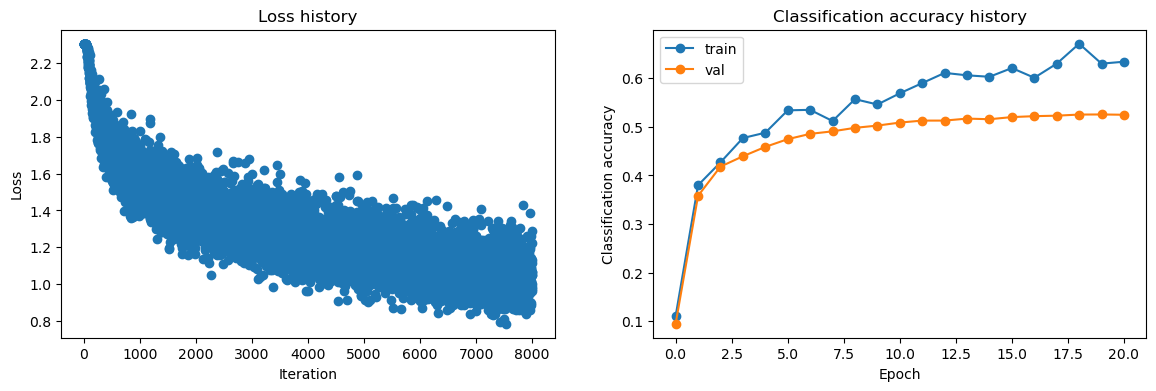

In [55]:
stats = {'loss_history': solver.loss_history, 'train_acc_history':solver.train_acc_history, 'val_acc_history':solver.val_acc_history}
from toolset import helper
helper.plot_stats(stats)

(用时 0.00s; 迭代次数1 / 40) loss: 2.594584
(Epoch 0 / 20, train 准确率: 20.00%, val准确率: 10.26%
(Epoch 1 / 20, train 准确率: 50.00%, val准确率: 13.01%
(Epoch 2 / 20, train 准确率: 68.00%, val准确率: 16.22%
(Epoch 3 / 20, train 准确率: 72.00%, val准确率: 14.35%
(Epoch 4 / 20, train 准确率: 80.00%, val准确率: 18.40%
(Epoch 5 / 20, train 准确率: 90.00%, val准确率: 17.37%
(用时 0.27s; 迭代次数11 / 40) loss: 0.535942
(Epoch 6 / 20, train 准确率: 92.00%, val准确率: 17.06%
(Epoch 7 / 20, train 准确率: 98.00%, val准确率: 18.90%
(Epoch 8 / 20, train 准确率: 100.00%, val准确率: 18.38%
(Epoch 9 / 20, train 准确率: 100.00%, val准确率: 18.78%
(Epoch 10 / 20, train 准确率: 100.00%, val准确率: 18.48%
(用时 0.49s; 迭代次数21 / 40) loss: 0.042539
(Epoch 11 / 20, train 准确率: 100.00%, val准确率: 18.80%
(Epoch 12 / 20, train 准确率: 100.00%, val准确率: 19.02%
(Epoch 13 / 20, train 准确率: 100.00%, val准确率: 18.93%
(Epoch 14 / 20, train 准确率: 100.00%, val准确率: 18.94%
(Epoch 15 / 20, train 准确率: 100.00%, val准确率: 18.95%
(用时 0.71s; 迭代次数31 / 40) loss: 0.028356
(Epoch 16 / 20, train 准确率: 100.00%, val准确率: 18.

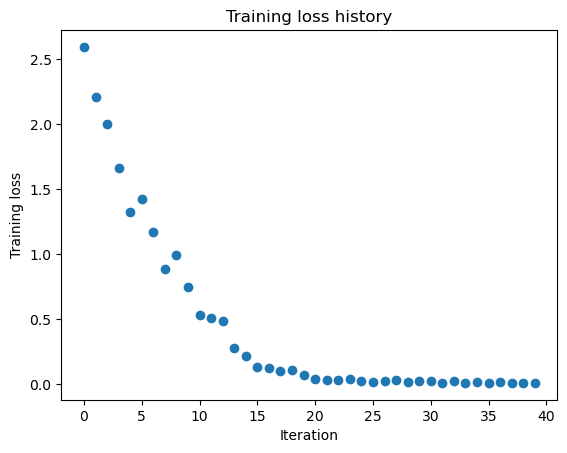

In [57]:
import matplotlib.pyplot as plt
from fully_connected_networks import FullyConnectedNet, get_three_layer_network_params

# TODO: Use a three-layer Net to overfit 50 training examples by 
# tweaking just the learning rate and initialization scale.
reset_seed(0)

num_train = 50
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

# Update parameters in get_three_layer_network_params
weight_scale, learning_rate = get_three_layer_network_params()

model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=torch.float32, device='cuda')
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                optim_config={
                  'learning_rate': learning_rate,
                },
                device='cuda',
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

running with  sgd
(用时 0.00s; 迭代次数1 / 200) loss: 2.302186
(Epoch 0 / 5, train 准确率: 9.40%, val准确率: 10.98%
(Epoch 1 / 5, train 准确率: 10.10%, val准确率: 9.51%
(Epoch 2 / 5, train 准确率: 9.90%, val准确率: 9.52%
(Epoch 3 / 5, train 准确率: 12.30%, val准确率: 10.05%
(Epoch 4 / 5, train 准确率: 10.50%, val准确率: 9.65%
(Epoch 5 / 5, train 准确率: 10.80%, val准确率: 9.52%

running with  sgd_momentum
(用时 0.11s; 迭代次数1 / 200) loss: 2.301805
(Epoch 0 / 5, train 准确率: 11.20%, val准确率: 11.84%
(Epoch 1 / 5, train 准确率: 11.40%, val准确率: 9.52%
(Epoch 2 / 5, train 准确率: 16.90%, val准确率: 15.53%
(Epoch 3 / 5, train 准确率: 17.50%, val准确率: 17.47%
(Epoch 4 / 5, train 准确率: 25.30%, val准确率: 22.07%
(Epoch 5 / 5, train 准确率: 29.10%, val准确率: 26.06%



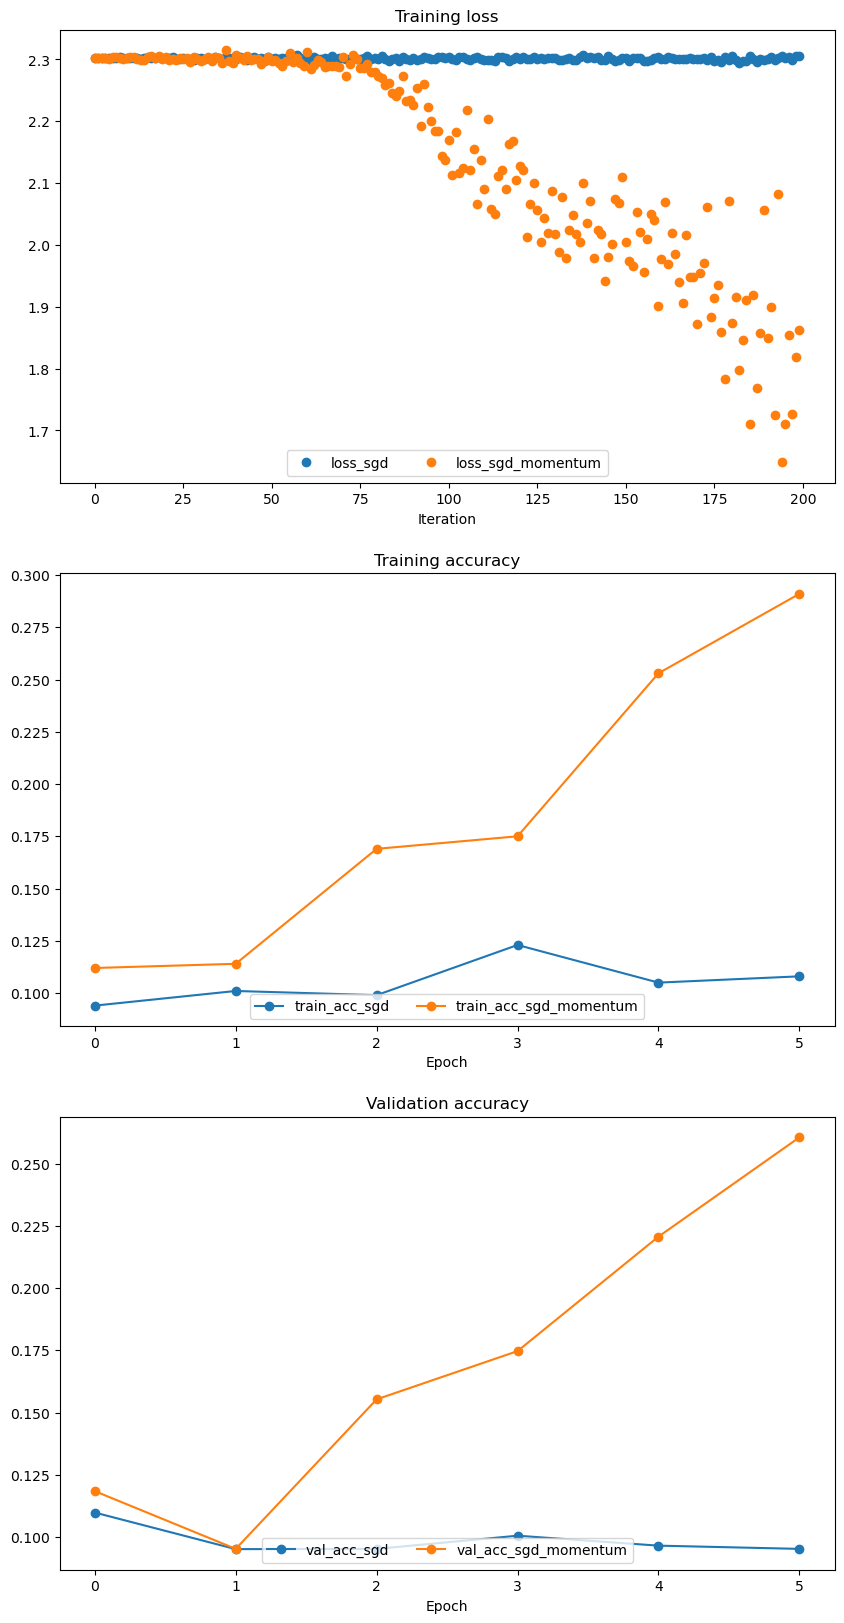

In [58]:
from fully_connected_networks import FullyConnectedNet, sgd, sgd_momentum

# TODO: Use a three-layer Net to overfit 50 training examples by 
# tweaking just the learning rate and initialization scale.
reset_seed(0)

num_train = 4000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

solvers = {}

for update_rule_name, update_rule_fn in [('sgd', sgd), ('sgd_momentum', sgd_momentum)]:
  print('running with ', update_rule_name)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2,
                            dtype=torch.float32, device='cuda')

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule_fn,
                  optim_config={
                    'learning_rate': 5e-2,
                  },
                  print_every=1000,
                  verbose=True,
                  device='cuda')
  solvers[update_rule_name] = solver
  solver.train()
  print()
  
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')
for update_rule, solver in solvers.items():
  plt.plot(solver.loss_history, 'o', label="loss_%s" % update_rule)
plt.legend(loc='lower center', ncol=4)
  
plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.items():
  plt.plot(solver.train_acc_history, '-o', label="train_acc_%s" % update_rule)
plt.legend(loc='lower center', ncol=4)

  
plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.items():
  plt.plot(solver.val_acc_history, '-o', label="val_acc_%s" % update_rule)
plt.legend(loc='lower center', ncol=4)

plt.gcf().set_size_inches(10, 20)
plt.show()

running with  adam
(用时 0.01s; 迭代次数1 / 200) loss: 2.303189
(Epoch 0 / 5, train 准确率: 10.90%, val准确率: 10.58%
(Epoch 1 / 5, train 准确率: 26.30%, val准确率: 25.41%
(Epoch 2 / 5, train 准确率: 34.80%, val准确率: 31.23%
(Epoch 3 / 5, train 准确率: 39.40%, val准确率: 33.61%
(Epoch 4 / 5, train 准确率: 41.70%, val准确率: 33.60%
(Epoch 5 / 5, train 准确率: 45.90%, val准确率: 35.15%

running with  rmsprop
(用时 0.01s; 迭代次数1 / 200) loss: 2.302898
(Epoch 0 / 5, train 准确率: 11.40%, val准确率: 10.48%
(Epoch 1 / 5, train 准确率: 22.90%, val准确率: 21.37%
(Epoch 2 / 5, train 准确率: 25.50%, val准确率: 24.03%
(Epoch 3 / 5, train 准确率: 28.20%, val准确率: 25.57%
(Epoch 4 / 5, train 准确率: 30.90%, val准确率: 25.96%
(Epoch 5 / 5, train 准确率: 27.30%, val准确率: 26.71%



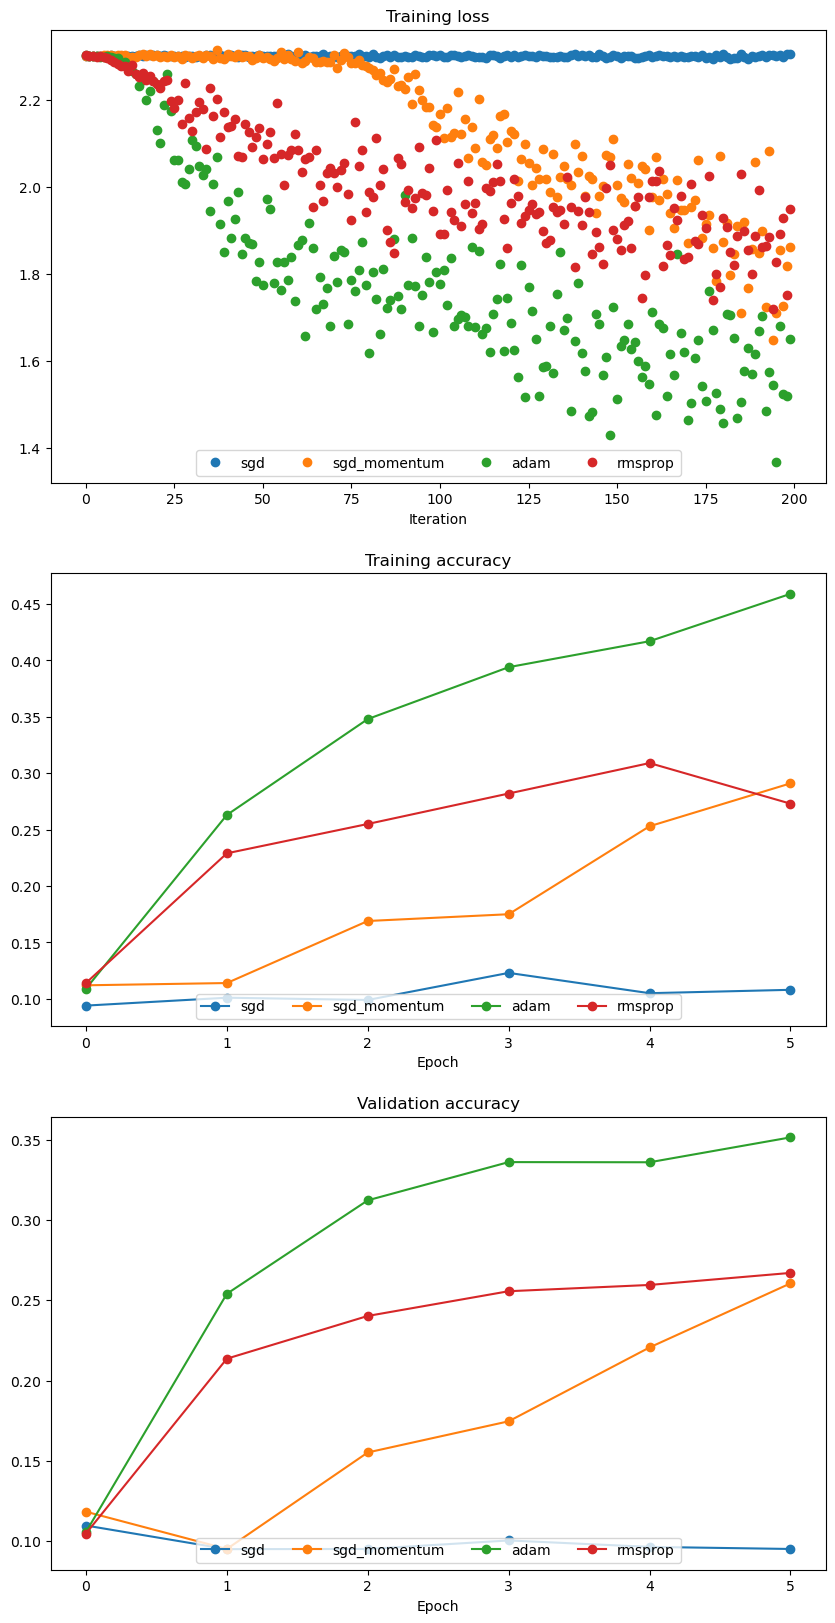

In [59]:
# Test Adam implementation
from fully_connected_networks import adam, rmsprop, FullyConnectedNet

for update_rule_name, update_rule_fn, learning_rate in [('adam', adam, 1e-3), ('rmsprop', rmsprop, 1e-4)]:
  print('running with ', update_rule_name)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2, device='cuda')

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule_fn,
                  optim_config={
                    'learning_rate': learning_rate
                  },
                  print_every=1000,
                  verbose=True, device='cuda')
  solvers[update_rule_name] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')
for update_rule, solver in list(solvers.items()):
  plt.plot(solver.loss_history, 'o', label=update_rule)
plt.legend(loc='lower center', ncol=4)
  
plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')
for update_rule, solver in list(solvers.items()):
  plt.plot(solver.train_acc_history, '-o', label=update_rule)
plt.legend(loc='lower center', ncol=4)

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for update_rule, solver in list(solvers.items()):
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
plt.legend(loc='lower center', ncol=4)

plt.gcf().set_size_inches(10, 20)
plt.show()

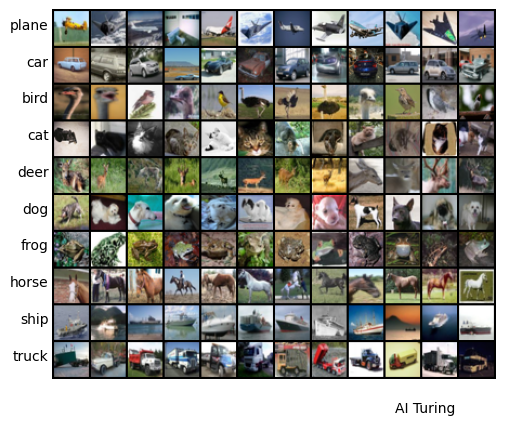

Train data shape:  torch.Size([40000, 3, 32, 32])
Train labels shape:  torch.Size([40000])
Validation data shape:  torch.Size([10000, 3, 32, 32])
Validation labels shape:  torch.Size([10000])
Test data shape:  torch.Size([10000, 3, 32, 32])
Test labels shape:  torch.Size([10000])


In [62]:
# Invoke the above function to get our data. 
import toolset as ts

ts.utils.reset_seed(0)
data_dict = ts.data.preprocess_cifar10(cuda=True, dtype=torch.float64, flatten=False)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

In [63]:
from convolutional_networks import DeepConvNet
from fully_connected_networks import adam
reset_seed(0)

# Try training a deep convolutional net with batchnorm
num_train = 500
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]

bn_model = DeepConvNet(input_dims=input_dims, num_classes=10,
                       num_filters=[16, 32, 32, 64, 64],
                       max_pools=[0, 1, 2, 3, 4],
                       weight_scale='kaiming',
                       batchnorm=True,
                       reg=1e-5,  dtype=torch.float32, device='cuda')
model = DeepConvNet(input_dims=input_dims, num_classes=10,
                    num_filters=[16, 32, 32, 64, 64],
                    max_pools=[0, 1, 2, 3, 4],
                    weight_scale='kaiming',
                    batchnorm=False,
                    reg=1e-5,  dtype=torch.float32, device='cuda')

print('Solver with batch norm:')
bn_solver = Solver(bn_model, small_data,
                   num_epochs=10, batch_size=100,
                   update_rule=adam,
                   optim_config={
                     'learning_rate': 1e-3,
                   },
                   print_every=20, device='cuda')
bn_solver.train()

print('\nSolver without batch norm:')
solver = Solver(model, small_data,
                num_epochs=10, batch_size=100,
                update_rule=adam,
                optim_config={
                  'learning_rate': 1e-3,
                },
                print_every=20, device='cuda')
solver.train()

Solver with batch norm:
(用时 3.28s; 迭代次数1 / 50) loss: 3.285034
(Epoch 0 / 10, train 准确率: 13.60%, val准确率: 11.86%
(Epoch 1 / 10, train 准确率: 15.00%, val准确率: 14.17%
(Epoch 2 / 10, train 准确率: 17.80%, val准确率: 13.50%
(Epoch 3 / 10, train 准确率: 26.20%, val准确率: 19.87%
(Epoch 4 / 10, train 准确率: 28.40%, val准确率: 20.14%
(用时 5.65s; 迭代次数21 / 50) loss: 1.753118
(Epoch 5 / 10, train 准确率: 34.60%, val准确率: 24.14%
(Epoch 6 / 10, train 准确率: 44.60%, val准确率: 28.60%
(Epoch 7 / 10, train 准确率: 55.00%, val准确率: 31.57%
(Epoch 8 / 10, train 准确率: 58.20%, val准确率: 31.61%
(用时 7.64s; 迭代次数41 / 50) loss: 1.268845
(Epoch 9 / 10, train 准确率: 63.00%, val准确率: 31.75%
(Epoch 10 / 10, train 准确率: 68.40%, val准确率: 33.05%

Solver without batch norm:
(用时 0.01s; 迭代次数1 / 50) loss: 2.376681
(Epoch 0 / 10, train 准确率: 8.20%, val准确率: 9.92%
(Epoch 1 / 10, train 准确率: 13.00%, val准确率: 10.16%
(Epoch 2 / 10, train 准确率: 13.00%, val准确率: 10.14%
(Epoch 3 / 10, train 准确率: 14.40%, val准确率: 10.91%
(Epoch 4 / 10, train 准确率: 27.20%, val准确率: 22.67%
(用时 1.66s; 

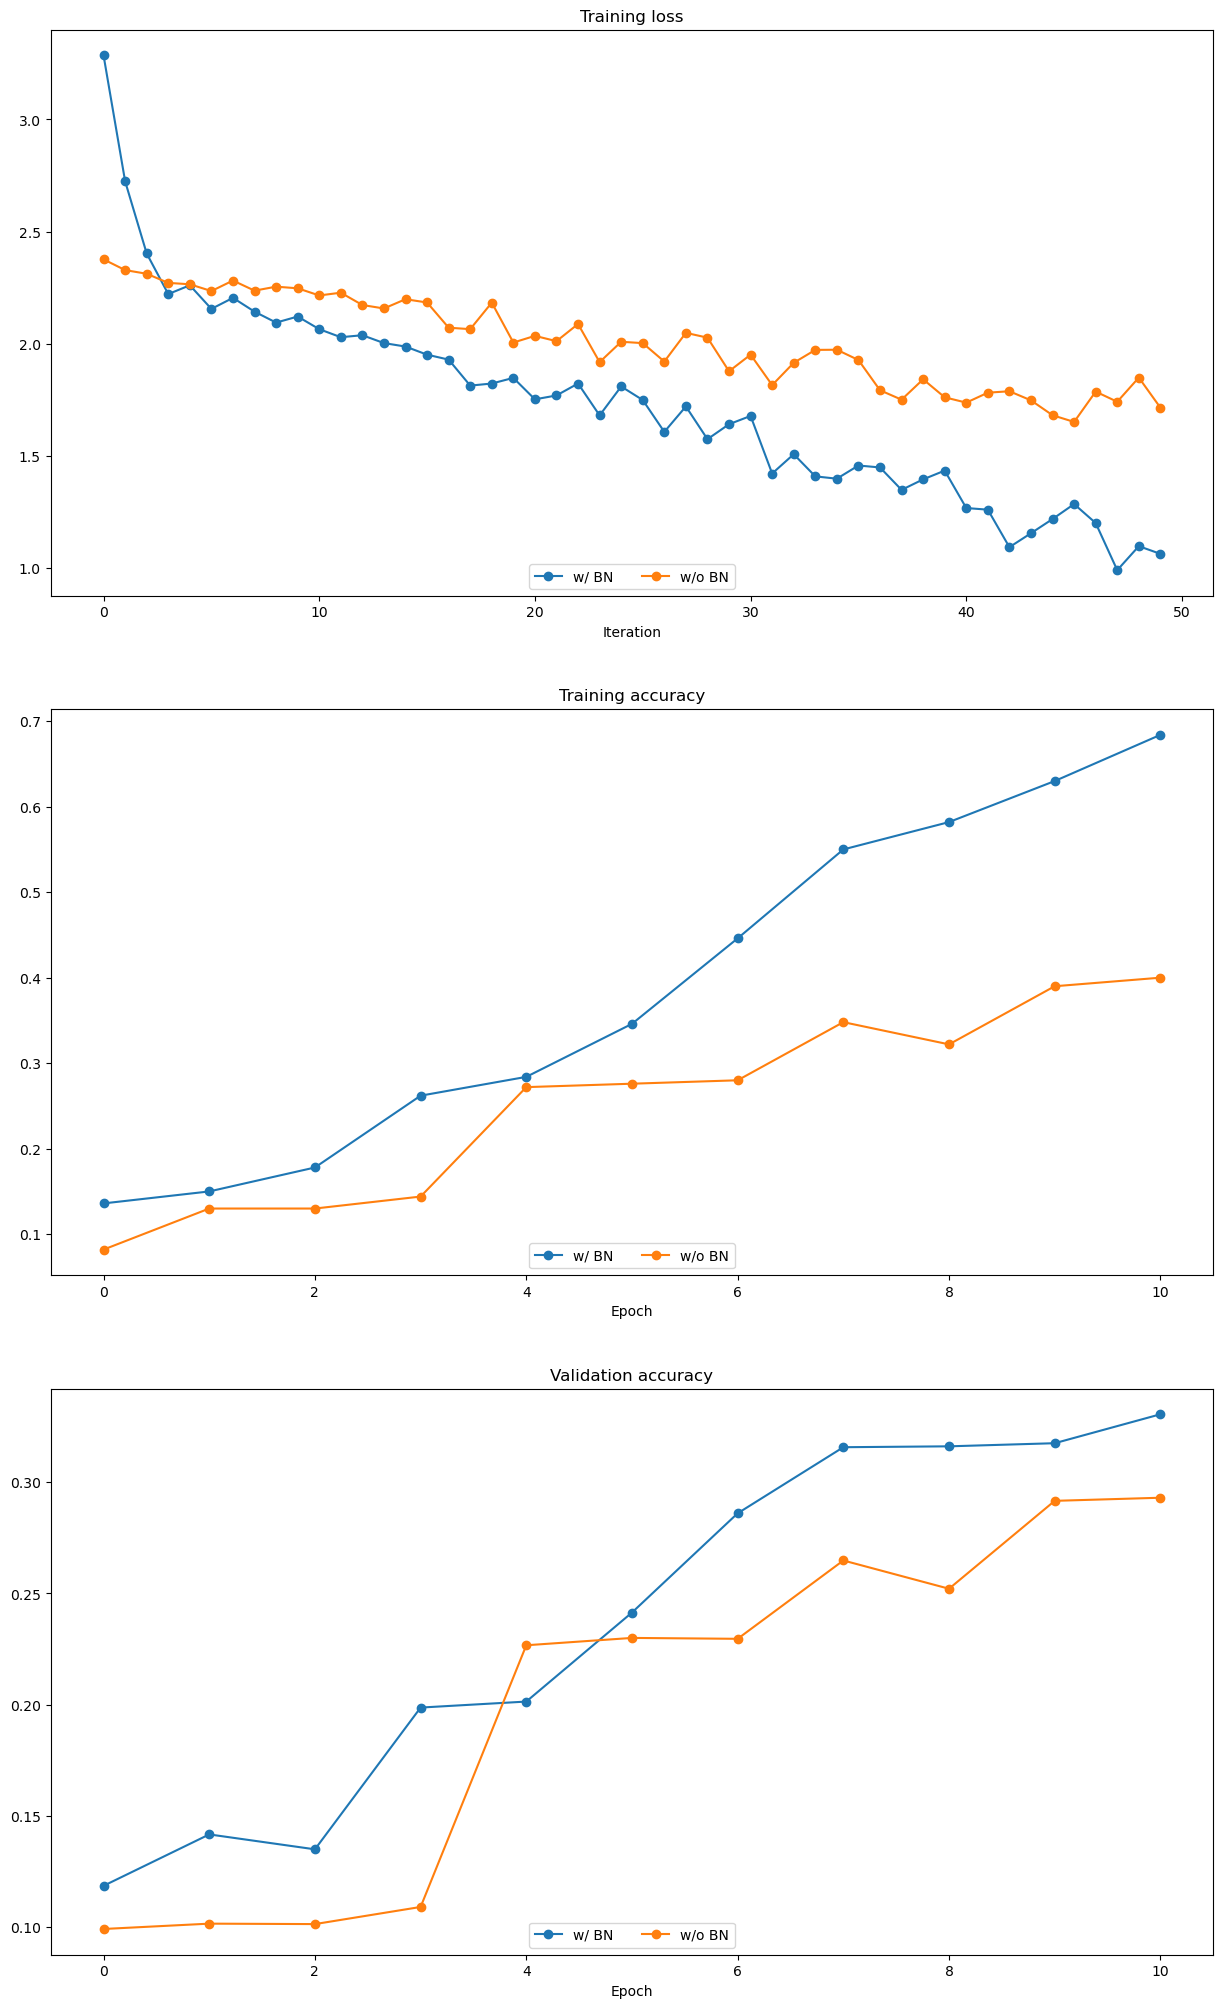

In [64]:
def plot_training_history_bn(title, label, solvers, bn_solvers, plot_fn, bl_marker='.', bn_marker='.', labels=None):
  """utility function for plotting training history"""
  plt.title(title)
  plt.xlabel(label)
  bn_plots = [plot_fn(bn_solver) for bn_solver in bn_solvers]
  bl_plots = [plot_fn(solver) for solver in solvers]
  num_bn = len(bn_plots)
  num_bl = len(bl_plots)
  for i in range(num_bn):
    label='w/ BN'
    if labels is not None:
      label += str(labels[i])
    plt.plot(bn_plots[i], bn_marker, label=label)
  for i in range(num_bl):
    label='w/o BN'
    if labels is not None:
      label += str(labels[i])
    plt.plot(bl_plots[i], bl_marker, label=label)
  plt.legend(loc='lower center', ncol=num_bn+num_bl)

plt.subplot(3, 1, 1)
plot_training_history_bn('Training loss','Iteration', [solver], [bn_solver], \
                      lambda x: x.loss_history, bl_marker='-o', bn_marker='-o')
plt.subplot(3, 1, 2)
plot_training_history_bn('Training accuracy','Epoch', [solver], [bn_solver], \
                      lambda x: x.train_acc_history, bl_marker='-o', bn_marker='-o')
plt.subplot(3, 1, 3)
plot_training_history_bn('Validation accuracy','Epoch', [solver], [bn_solver], \
                      lambda x: x.val_acc_history, bl_marker='-o', bn_marker='-o')

plt.gcf().set_size_inches(15, 25)
plt.show()

In [65]:
from convolutional_networks import DeepConvNet
from fully_connected_networks import sgd_momentum
reset_seed(0)

# Try training a very deep net with batchnorm
num_train = 10000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]
num_epochs = 5
lrs = [2e-1, 1e-1, 5e-2]
lrs = [5e-3, 1e-2, 2e-2]

solvers = []
for lr in lrs:
  print('No normalization: learning rate = ', lr)
  model = DeepConvNet(input_dims=input_dims, num_classes=10,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 1, 2],
                      weight_scale='kaiming',
                      batchnorm=False,
                      reg=1e-5, dtype=torch.float32, device='cuda')
  solver = Solver(model, small_data,
                  num_epochs=num_epochs, batch_size=100,
                  update_rule=sgd_momentum,
                  optim_config={
                    'learning_rate': lr,
                  },
                  verbose=False, device='cuda')
  solver.train()
  solvers.append(solver)

bn_solvers = []
for lr in lrs:
  print('Normalization: learning rate = ', lr)
  bn_model = DeepConvNet(input_dims=input_dims, num_classes=10,
                         num_filters=[8, 8, 16, 16, 32, 32],
                         max_pools=[1, 3, 5],
                         weight_scale='kaiming',
                         batchnorm=True,
                         reg=1e-5, dtype=torch.float32, device='cuda')
  bn_solver = Solver(bn_model, small_data,
                     num_epochs=num_epochs, batch_size=128,
                     update_rule=sgd_momentum,
                     optim_config={
                       'learning_rate': lr,
                     },
                     verbose=False, device='cuda')
  bn_solver.train()
  bn_solvers.append(bn_solver)

No normalization: learning rate =  0.005
No normalization: learning rate =  0.01
No normalization: learning rate =  0.02
Normalization: learning rate =  0.005
Normalization: learning rate =  0.01
Normalization: learning rate =  0.02


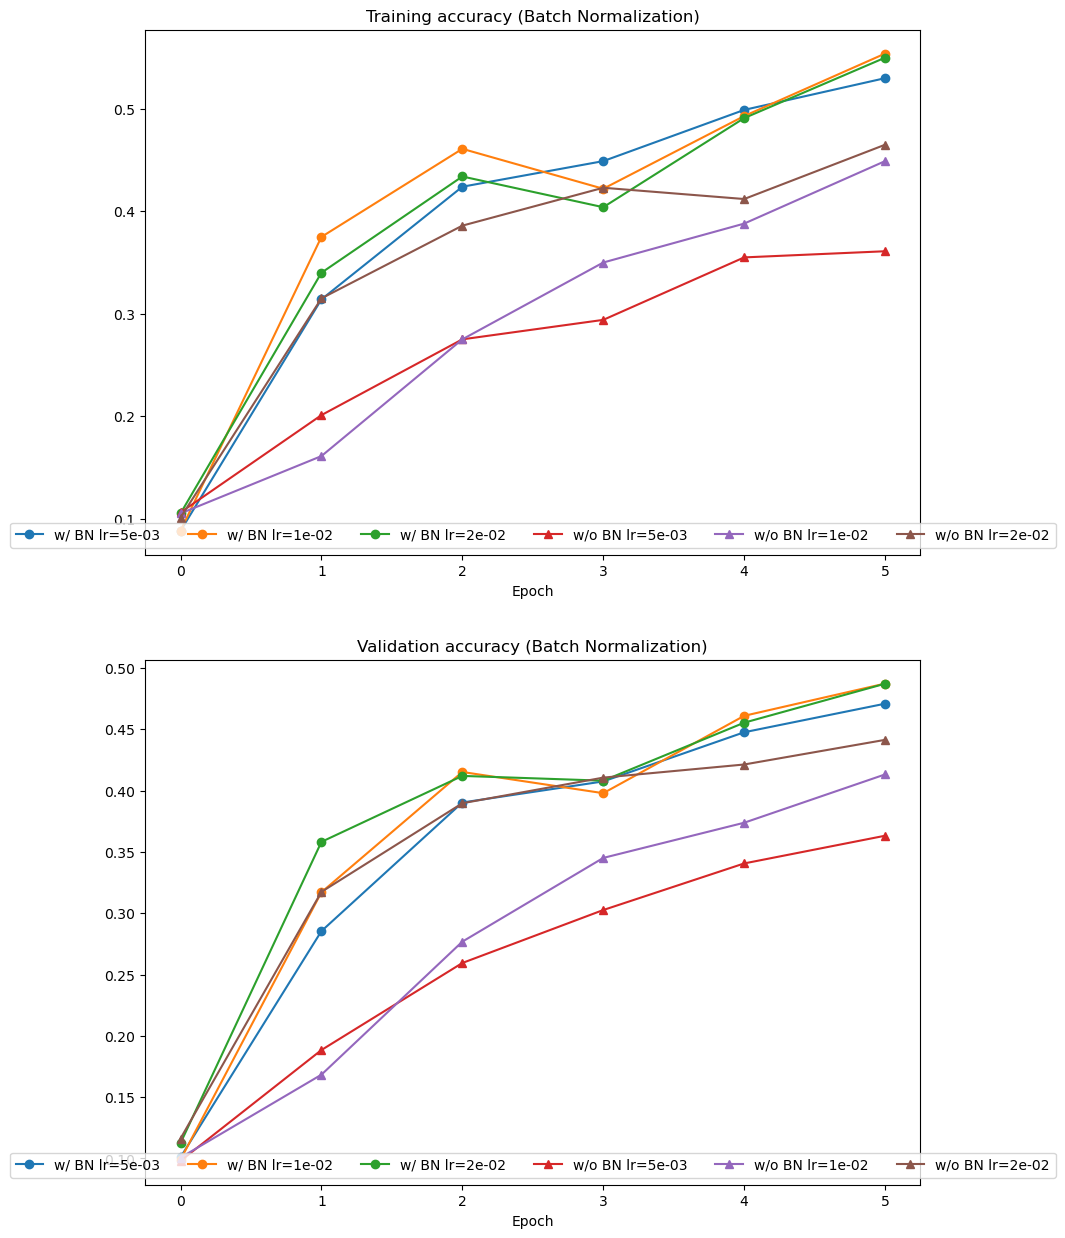

In [67]:
plt.subplot(2, 1, 1)
plot_training_history_bn('Training accuracy (Batch Normalization)','Epoch', solvers, bn_solvers, \
                      lambda x: x.train_acc_history, bl_marker='-^', bn_marker='-o', labels=[' lr={:.0e}'.format(lr) for lr in lrs])
plt.subplot(2, 1, 2)
plot_training_history_bn('Validation accuracy (Batch Normalization)','Epoch', solvers, bn_solvers, \
                      lambda x: x.val_acc_history, bl_marker='-^', bn_marker='-o', labels=[' lr={:.0e}'.format(lr) for lr in lrs])

plt.gcf().set_size_inches(10, 15)
plt.show()

In [7]:
from convolutional_networks import *

a = VggNet()
print()